<a href="https://colab.research.google.com/github/KC-Night/SQL-Lite--SuperHero/blob/main/Superhero_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Superhero Database Assignment (SQLite & Google Colab)

## Objective
In this assignment, you will design and implement a **Superhero Database** using SQLite in Google Colab. This database will store superheroes, villains, and their battles. You will write SQL queries to analyze battle outcomes and relationships between heroes and villains.

### Group Size:
- 2 to 3 students per group.

### Tools Required:
- **Google Colab**
- **SQLite (built into Python)**
- **CSV files (provided for import)**

## Step 1: Setting Up Your SQLite Database

### Tasks:
1. Initialize SQLite in Google Colab.
2. Create a database named `superhero_db.sqlite`.
3. Define the database schema, ensuring it includes the following tables:
   - `heroes`: Stores superhero names, powers, and teams.
   - `villains`: Stores villains and their evil plans.
   - `battles`: Tracks battles between heroes and villains, including the outcome.
4. Implement primary keys and foreign keys where appropriate.

✅ **Checkpoint:** Ensure that the database and tables have been successfully created.

In [2]:
# Initialize SQLite
import sqlite3

# Create database
connection = sqlite3.connect('superhero_db.sqlite')
print("Database created and connected!")
cursor = connection.cursor()
print("Cursor created!")

Database created and connected!
Cursor created!


In [3]:
#Heroes table
cursor.execute('''
CREATE TABLE IF NOT EXISTS heroes (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    name TEXT NOT NULL,
    power TEXT NOT NULL,
    team TEXT NOT NULL
)
''')

print("heroes table created!")

heroes table created!


In [4]:
#Villians table
cursor.execute('''
CREATE TABLE IF NOT EXISTS villains (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    name TEXT NOT NULL,
    evil_plans TEXT NOT NULL
)
''')

print("villians table created!")

villians table created!


In [5]:
#Battles table
cursor.execute('''
CREATE TABLE IF NOT EXISTS battles (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    hero_id INTEGER NOT NULL,
    villian_id INTEGER NOT NULL,
    outcome TEXT NOT NULL,
    FOREIGN KEY (hero_id) REFERENCES heroes(id),
    FOREIGN KEY (villian_id) REFERENCES villains(id)
)
''')

print("battles table created!")

battles table created!


## Step 2: Import Data from CSV Files

### Tasks:
1. Download the provided CSV files.
2. Upload them to Google Colab.
3. Write a script to import data from these files into the appropriate tables.
4. Verify that the data has been successfully inserted.

✅ **Checkpoint:** Ensure that each table contains the expected data from the CSV files.

In [6]:
import pandas as pd

# Read the CSV files into DataFrames
heroes_data = pd.read_csv("heroes.csv")
villains_data = pd.read_csv('villains.csv')
battles_data = pd.read_csv('battles.csv')

In [7]:
heroes_data.to_sql('heroes', connection, if_exists='replace', index=False)
villains_data.to_sql('villains', connection, if_exists='replace', index=False)
battles_data.to_sql('battles', connection, if_exists='replace', index=False)

30

In [8]:
#Verify data has been inserted
cursor.execute("SELECT * FROM heroes")
rows = cursor.fetchall()

print("heroes data:")
for row in rows:
    print(row)

heroes data:
(1, 'Spider-Man', 'Web-slinging', 'Avengers')
(2, 'Iron Man', 'Powered Armor', 'Avengers')
(3, 'Batman', 'Genius Detective', 'Justice League')
(4, 'Superman', 'Super Strength', 'Justice League')
(5, 'Thor', 'God of Thunder', 'Avengers')
(6, 'Wonder Woman', 'Amazonian Strength', 'Justice League')
(7, 'Black Panther', 'Enhanced Agility', 'Avengers')
(8, 'The Flash', 'Super Speed', 'Justice League')
(9, 'Hulk', 'Super Strength', 'Avengers')
(10, 'Doctor Strange', 'Mystic Arts', 'Avengers')


In [9]:
cursor.execute("SELECT * FROM villains")
rows = cursor.fetchall()

print("villains data:")
for row in rows:
    print(row)


villains data:
(1, 'Green Goblin', 'Terrorize New York')
(2, 'Thanos', 'Collect all Infinity Stones')
(3, 'Joker', 'Spread chaos in Gotham')
(4, 'Lex Luthor', 'Defeat Superman')
(5, 'Loki', 'Trick humanity into worshiping him')
(6, 'Ultron', 'AI world domination')
(7, 'Darkseid', 'Control the universe')
(8, 'Venom', 'Consume Spider-Man')
(9, 'Magneto', 'Mutant supremacy')
(10, 'Red Skull', 'Revive Hydra')


In [10]:
cursor.execute("SELECT * FROM battles")
rows = cursor.fetchall()

print("battles data:")
for row in rows:
    print(row)

battles data:
(1, 1, 10, 'Villain Wins')
(2, 9, 3, 'Hero Wins')
(3, 8, 1, 'Draw')
(4, 5, 4, 'Villain Wins')
(5, 1, 7, 'Hero Wins')
(6, 2, 8, 'Villain Wins')
(7, 9, 8, 'Hero Wins')
(8, 3, 2, 'Hero Wins')
(9, 7, 5, 'Hero Wins')
(10, 3, 1, 'Draw')
(11, 1, 8, 'Villain Wins')
(12, 2, 1, 'Draw')
(13, 8, 9, 'Hero Wins')
(14, 8, 1, 'Draw')
(15, 6, 10, 'Draw')
(16, 1, 1, 'Villain Wins')
(17, 8, 3, 'Draw')
(18, 6, 3, 'Villain Wins')
(19, 4, 8, 'Villain Wins')
(20, 3, 4, 'Hero Wins')
(21, 8, 1, 'Draw')
(22, 4, 9, 'Draw')
(23, 3, 9, 'Draw')
(24, 8, 9, 'Villain Wins')
(25, 2, 5, 'Draw')
(26, 3, 7, 'Draw')
(27, 10, 3, 'Draw')
(28, 3, 8, 'Draw')
(29, 3, 5, 'Hero Wins')
(30, 5, 5, 'Hero Wins')


In [11]:
connection.commit()
print("Changes committed successfully!")

Changes committed successfully!


## Step 3: Querying the Database

### Tasks:
Write SQL queries to answer the following:
1. Retrieve all superheroes and their powers.
2. Find all battles where the hero won.
3. List all villains and their evil plans.
4. Determine which superhero has fought the most battles.

✅ **Checkpoint:** Ensure that all queries return meaningful results from the database.

In [12]:
#Retrieve superheroes and powers
cursor.execute("SELECT name, power FROM heroes")
heroes_data = cursor.fetchall()

print("Heroes data:")
for hero in heroes_data:
    print(f"Name: {hero[0]}, Power: {hero[1]}")

Heroes data:
Name: Spider-Man, Power: Web-slinging
Name: Iron Man, Power: Powered Armor
Name: Batman, Power: Genius Detective
Name: Superman, Power: Super Strength
Name: Thor, Power: God of Thunder
Name: Wonder Woman, Power: Amazonian Strength
Name: Black Panther, Power: Enhanced Agility
Name: The Flash, Power: Super Speed
Name: Hulk, Power: Super Strength
Name: Doctor Strange, Power: Mystic Arts


In [13]:
#Battles where heroes won
cursor.execute("SELECT * FROM battles WHERE outcome = 'Hero Wins'")
rows = cursor.fetchall()

print("Battles data:")
for row in rows:
    print(f"Battle ID: {row[0]}, Outcome: {row[3]}")

Battles data:
Battle ID: 2, Outcome: Hero Wins
Battle ID: 5, Outcome: Hero Wins
Battle ID: 7, Outcome: Hero Wins
Battle ID: 8, Outcome: Hero Wins
Battle ID: 9, Outcome: Hero Wins
Battle ID: 13, Outcome: Hero Wins
Battle ID: 20, Outcome: Hero Wins
Battle ID: 29, Outcome: Hero Wins
Battle ID: 30, Outcome: Hero Wins


In [14]:
#List of all villians and evil plans
cursor.execute("SELECT * FROM villains")
rows = cursor.fetchall()

print("villains data:")
for row in rows:
    print(row)

villains data:
(1, 'Green Goblin', 'Terrorize New York')
(2, 'Thanos', 'Collect all Infinity Stones')
(3, 'Joker', 'Spread chaos in Gotham')
(4, 'Lex Luthor', 'Defeat Superman')
(5, 'Loki', 'Trick humanity into worshiping him')
(6, 'Ultron', 'AI world domination')
(7, 'Darkseid', 'Control the universe')
(8, 'Venom', 'Consume Spider-Man')
(9, 'Magneto', 'Mutant supremacy')
(10, 'Red Skull', 'Revive Hydra')


In [15]:
#Determine which superhero has fought the most battles
cursor.execute("""
    SELECT hero_id, COUNT(*) as battle_count
    FROM battles
    GROUP BY hero_id
    ORDER BY battle_count DESC
    LIMIT 1
""")

most_battles = cursor.fetchone()

if most_battles:
    print(f"Hero ID who fought the most battles: {most_battles[0]} (Total Battles: {most_battles[1]})")
else:
    print("No battle data found.")

Hero ID who fought the most battles: 3 (Total Battles: 7)


## Step 4: Add a Custom Feature

### Tasks:
1. Design and implement an additional table related to superheroes or villains.
2. Populate it with data.
3. Write at least one query to retrieve meaningful insights from the new table.

**Examples of Custom Features:**
- Sidekicks for superheroes
- Villain hideouts
- Battle locations
- Superhero equipment

✅ **Checkpoint:** Ensure that the new table and queries function correctly.

In [16]:
#Design table, implement table, populate it with data
cursor.execute("""
    CREATE TABLE IF NOT EXISTS comic_company (
        id INTEGER PRIMARY KEY AUTOINCREMENT,
        name TEXT NOT NULL,
        company TEXT NOT NULL
    )
""");

comic_company= [
  ('Spider-Man', 'Marvel'),
  ('Iron Man', 'Marvel'),
  ('Batman', 'DC'),
  ('Superman', 'DC'),
  ('Thor', 'Marvel'),
  ('Wonder Woman', 'DC'),
  ('Black Panther', 'Marvel'),
  ('Flash', 'DC'),
  ('Hulk', 'Marvel'),
  ('Doctor Strange', 'Marvel'),
]

cursor.executemany("INSERT INTO comic_company (name, company) VALUES (?, ?)", comic_company)

In [17]:
#Query
cursor.execute("SELECT * FROM comic_company WHERE company = 'Marvel'")
rows = cursor.fetchall()

print("Comic_company data:")
for row in rows:
    print(f"Name: {row[1]}, Company: {row[2]}")

Comic_company data:
Name: Spider-Man, Company: Marvel
Name: Iron Man, Company: Marvel
Name: Thor, Company: Marvel
Name: Black Panther, Company: Marvel
Name: Hulk, Company: Marvel
Name: Doctor Strange, Company: Marvel


In [18]:
#Test table
cursor.execute("SELECT * FROM comic_company")
rows = cursor.fetchall()

print("Comic_company Table Data:")
for row in rows:
    print(row)

cursor.execute ("""
    DROP TABLE IF EXISTS comic_company
""");

Comic_company Table Data:
(1, 'Spider-Man', 'Marvel')
(2, 'Iron Man', 'Marvel')
(3, 'Batman', 'DC')
(4, 'Superman', 'DC')
(5, 'Thor', 'Marvel')
(6, 'Wonder Woman', 'DC')
(7, 'Black Panther', 'Marvel')
(8, 'Flash', 'DC')
(9, 'Hulk', 'Marvel')
(10, 'Doctor Strange', 'Marvel')


## Bonus Challenge (+5 Points)

### Tasks:
1. Enhance your project by adding a visual or interactive component.

**Options:**
- Visualize battles using Matplotlib (e.g., a bar chart showing how many battles each superhero has fought).
- Make it interactive (e.g., allow users to input a superhero name and display their battles).

✅ **Checkpoint:** If attempting the bonus, ensure that your visualization or interactive component works correctly.

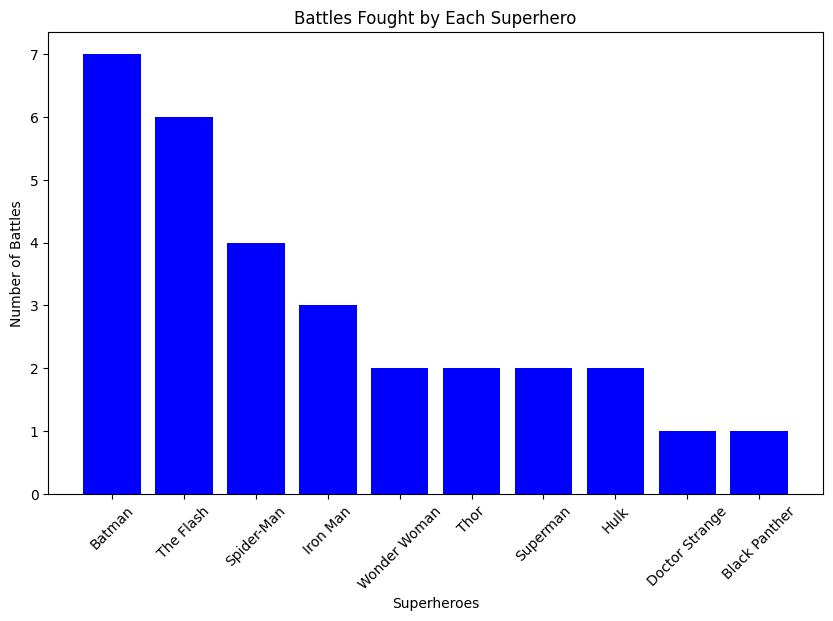

In [19]:
import matplotlib.pyplot as plt

cursor.execute("""
    SELECT heroes.name, COUNT(battles.id) as battle_count
    FROM battles
    JOIN heroes ON battles.hero_id = heroes.id
    GROUP BY heroes.name
    ORDER BY battle_count DESC
""")

battle_data = cursor.fetchall()

hero_names = [row[0] for row in battle_data]
battles = [row[1] for row in battle_data]

plt.figure(figsize = (10, 6))
plt.bar(hero_names, battles, color = 'blue')
plt.xlabel('Superheroes')
plt.ylabel('Number of Battles')
plt.title('Battles Fought by Each Superhero')
plt.xticks(rotation = 45)
plt.show()

## Submission Guidelines

Each group must submit a **Google Colab Notebook (.ipynb)** containing:
- ✅ **Database schema (DDL)**
- ✅ **CSV imports & data insertion (DML)**
- ✅ **SQL queries & results**
- ✅ **Custom feature (bonus if applicable)**

## Grading Criteria (Total: 25 Points)

| Section                 | Points |
|-------------------------|--------|
| Database Setup          | 5      |
| Data Importing         | 10     |
| Querying the Data      | 10     |
| Extra Feature          | 5      |
| Bonus Challenge (Optional) | +5  |

### Final Notes:
- Be **creative** when designing superheroes and villains.
- **Comment your code** to explain its functionality.
- **Have fun** building your superhero universe!